In [1]:
from learning_center import *
from matplotlib import pyplot as plt
import numpy as np

In [19]:
#runData = specify runData directory, CFD-Data is available on request.


#### Initialize Design Assistant: ###

In [3]:
l = learning_center(runData = runData, cluster_anzahl = 20)

First Object: Retrain first:
*** Start Retrain ***
Time taken for sorting and loading File-List: 4.32050895690918 seconds
Time taken for loading: 1.4479317665100098 seconds
Loaded Tensors from  b1
Time taken for sorting and loading File-List: 0.20798397064208984 seconds
Time taken for loading: 1.3325223922729492 seconds
Loaded Tensors from  b2
Time taken for sorting and loading File-List: 0.18379521369934082 seconds
Time taken for loading: 1.1867871284484863 seconds
Loaded Tensors from  b3
Time taken for sorting and loading File-List: 0.20432162284851074 seconds
Time taken for loading: 1.2073314189910889 seconds
Loaded Tensors from  b4
Time taken for sorting and loading File-List: 0.11960101127624512 seconds
Time taken for loading: 1.2479865550994873 seconds
Loaded Tensors from  b5
Time taken for sorting and loading File-List: 0.12389087677001953 seconds
Time taken for loading: 1.1089417934417725 seconds
Loaded Tensors from  b6
Time taken for sorting and loading File-List: 0.1200706958

#### Train AutoEncoder: ###
If use of cuda-capable device, use pretrained model.

In [4]:
#l.train_model_c_all(max_iter = 40)

#### Cluster Latent Space: ###
Extraction of latent data, clustering and assignment of cluster-ids.
(Routine is already executed when initializing first object of learning_center,
following methods provide manual workflow.)

In [5]:
l.load_tensors(normalize = True)
l.get_latent_data()
l.get_cluster_ids(mode = 'all')

Time taken for sorting and loading File-List: 4.2134222984313965 seconds
Time taken for loading: 0.27518653869628906 seconds
Loaded Tensors from  b1
Time taken for sorting and loading File-List: 0.12662053108215332 seconds
Time taken for loading: 0.6418354511260986 seconds
Loaded Tensors from  b2
Time taken for sorting and loading File-List: 0.12044930458068848 seconds
Time taken for loading: 1.2439351081848145 seconds
Loaded Tensors from  b3
Time taken for sorting and loading File-List: 0.1204841136932373 seconds
Time taken for loading: 1.2178151607513428 seconds
Loaded Tensors from  b4
Time taken for sorting and loading File-List: 0.12109518051147461 seconds
Time taken for loading: 1.2230346202850342 seconds
Loaded Tensors from  b5
Time taken for sorting and loading File-List: 0.11977887153625488 seconds
Time taken for loading: 1.1574194431304932 seconds
Loaded Tensors from  b6
Time taken for sorting and loading File-List: 0.11956405639648438 seconds
Time taken for loading: 1.0856158

#### NN Mapping for Cluster-ID Prediction: ####
Multiclass Prediction Neural Network is trained to predict future turbines' cluster-id.
Testdata are the latest individuals (size_testdata).
(Routine is already executed when initializing first object of learning_center,
following methods provide manual workflow.)

In [6]:
l.fit_data(solver='lbfgs', validation_fraction=0.1, hidden_layer = (64,54), size_testdata = 15, activation = 'relu' )

Accuracy: 100.00% for area b1.
Accuracy on Test-Data: 73.33% for area b1.
Accuracy: 100.00% for area b2.
Accuracy on Test-Data: 73.33% for area b2.
Accuracy: 100.00% for area b3.
Accuracy on Test-Data: 86.67% for area b3.
Accuracy: 100.00% for area b4.
Accuracy on Test-Data: 80.00% for area b4.
Accuracy: 100.00% for area b5.
Accuracy on Test-Data: 93.33% for area b5.
Accuracy: 100.00% for area b6.
Accuracy on Test-Data: 80.00% for area b6.
Accuracy: 99.63% for area b7.
Accuracy on Test-Data: 86.67% for area b7.
Accuracy: 100.00% for area b8.
Accuracy on Test-Data: 60.00% for area b8.


#### Have a look at the results: ####

In [7]:
#Choose turbine your are interested in:
case_id = 594

In [8]:
l.get_data(case_id)

Case-Data for T1_594.
[Fmean,        F,           Objectives]


[0.08321132916698967,
 array([0.07425706, 0.00443709, 0.17093984]),
 array([-0.06271652, -0.03919215, -0.13290157,  0.01856896,  0.02762934,
        -0.00737009,  1.40571374,  1.16890676,  1.35450633,  0.4140224 ,
         0.44333802,  0.52739265, -0.04833411, -0.09692301, -0.1216935 ,
         0.55247893,  0.87912153,  1.18555713,  0.05316972,  0.05490793,
         0.04373558,  0.02994582,  0.03254256,  0.04723693,  0.00625185,
         0.02125665,  0.04089324,  0.54722101,  0.43719302,  0.55978769])]

In [9]:
cluster_id = l.give_cluster_id(case_id)
cluster_id

Cluster_id for case T1_594


array([[19, 12,  5, 19,  3,  1,  8, 17]], dtype=int32)

In [10]:
print(f"See all individuals with cluster-id: {cluster_id[0]}.")
l.give_fitness(cluster_id)

See all individuals with cluster-id: [19 12  5 19  3  1  8 17].
[CaseIDs,   Objectives,   Fitness-Werte,   Fitness-Mittelwert, Eta, dH , VCav, P ]


[array(['T1_266_all', 'T1_594_all', 'T1_770_all', 'T1_873_all',
        'T1_964_all'], dtype='<U10'),
 array([[-0.06216019, -0.03919215, -0.13285037,  0.01856896,  0.02762934,
         -0.00737009,  1.38312541,  1.16846291,  1.35451941,  0.4140224 ,
          0.44324906,  0.5277396 , -0.05131991, -0.09692301, -0.1216935 ,
          0.55247893,  0.78869818,  1.18555713,  0.05316972,  0.01719972,
          0.03847452,  0.02994582,  0.03254256,  0.04723693,  0.00740983,
          0.02126176,  0.04061497,  0.54717738,  0.43752186,  0.46747829],
        [-0.06271652, -0.03919215, -0.13290157,  0.01856896,  0.02762934,
         -0.00737009,  1.40571374,  1.16890676,  1.35450633,  0.4140224 ,
          0.44333802,  0.52739265, -0.04833411, -0.09692301, -0.1216935 ,
          0.55247893,  0.87912153,  1.18555713,  0.05316972,  0.05490793,
          0.04373558,  0.02994582,  0.03254256,  0.04723693,  0.00625185,
          0.02125665,  0.04089324,  0.54722101,  0.43719302,  0.55978769],
        

In [11]:
print('Best performing five cluster-ids')
l.cluster_ids_valued[0][0:5]

Best performing five cluster-ids


[array([17,  1,  9,  0,  0,  6, 17, 11], dtype=int32),
 array([11,  3, 19,  1, 10,  6,  8, 17], dtype=int32),
 array([19, 12,  5, 19,  3,  1,  8, 17], dtype=int32),
 array([14,  7, 12, 19, 17, 19,  1,  7], dtype=int32),
 array([ 8, 18,  4,  1, 10, 19, 13, 14], dtype=int32)]

In [12]:
#l.give_fitness(l.cluster_ids_valued[0][2])

#### Plot Pressure Field of Cluster-ID: ####

In [13]:
### you must reload Tensors befor plotting is possible ###
l.load_tensors()

Time taken for sorting and loading File-List: 3.978912591934204 seconds
Time taken for loading: 0.27406764030456543 seconds
Loaded Tensors from  b1
Time taken for sorting and loading File-List: 0.11732196807861328 seconds
Time taken for loading: 0.26598572731018066 seconds
Loaded Tensors from  b2
Time taken for sorting and loading File-List: 0.11980056762695312 seconds
Time taken for loading: 0.26961255073547363 seconds
Loaded Tensors from  b3
Time taken for sorting and loading File-List: 0.12273859977722168 seconds
Time taken for loading: 0.23296451568603516 seconds
Loaded Tensors from  b4
Time taken for sorting and loading File-List: 0.12165212631225586 seconds
Time taken for loading: 0.4643228054046631 seconds
Loaded Tensors from  b5
Time taken for sorting and loading File-List: 0.1247565746307373 seconds
Time taken for loading: 3.32281756401062 seconds
Loaded Tensors from  b6
Time taken for sorting and loading File-List: 0.11967849731445312 seconds
Time taken for loading: 3.2474772

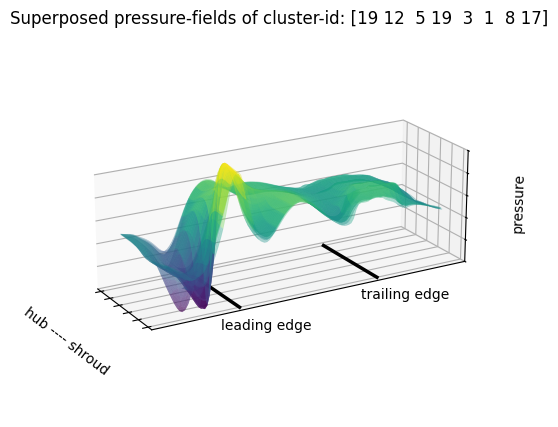

In [14]:
l.plot_tensor_all(cluster_id[0])

#### Recommendation and Prediction based on DOFs (x): ####
Obviously, already simulated cases aren't that hard to predict.
But nevertheless here given as an example:

In [15]:
case_id = 594
x = l.case_data[1][case_id - 1 ]

print("Recommendation for DOFs:\n")
recommend = l.recommend_sim([x])

print(f'Correct Fitness: {l.case_data[2][case_id-1]}')

Recommendation for DOFs:

EVAL CONTER = 1
Gaussian Process with dim = 3.
Recommend Sim: True. Known Cluster_ID: True. Gaussian Estimation: True.
Predicted Fitness: [0.07419492 0.00440863 0.16967701]
Correct Fitness: [0.07425706 0.00443709 0.17093984]


Test on unkown data:

In [17]:
objectives = np.load('./prediction_data/objectives.npy')
fitness_resimulated = np.load('./prediction_data/fitness.npy')

In [18]:
#case_predict = np.random.randint(0,objectives.shape[0])
case_predict = 1
recommend = l.recommend_sim([objectives[case_predict]])
print(f"Correct Fitness: {fitness_resimulated[case_predict]}.")

EVAL CONTER = 2
Recommend Sim: False. Known Cluster_ID: True. Gaussian Estimation: False.
Predicted Fitness: [0.09107862 0.00443665 0.03530737]
Correct Fitness: [0.09333277 0.00439002 0.0331774 ].
